In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/drug review SA'
train_data = pd.read_csv(PATH + '/data/drugslib/drugLibTrain_raw.tsv', sep='\t')
test_data = pd.read_csv(PATH +'/data/drugslib/drugLibTest_raw.tsv', sep='\t')
df = pd.concat([train_data, test_data])
df.shape

(4143, 9)

In [ ]:
df.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')

In [ ]:
drop_cols = ['Unnamed: 0', 'urlDrugName',  'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview']
df = df.drop(drop_cols, axis =1)
df.head()

,rating,commentsReview
0,4,"monitor blood pressure , weight and asses for ..."
1,1,"I Hate This Birth Control, I Would Not Suggest..."
2,10,I took 2 pills at the onset of my menstrual cr...
3,3,I was given Prilosec prescription at a dose of...
4,2,See above


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


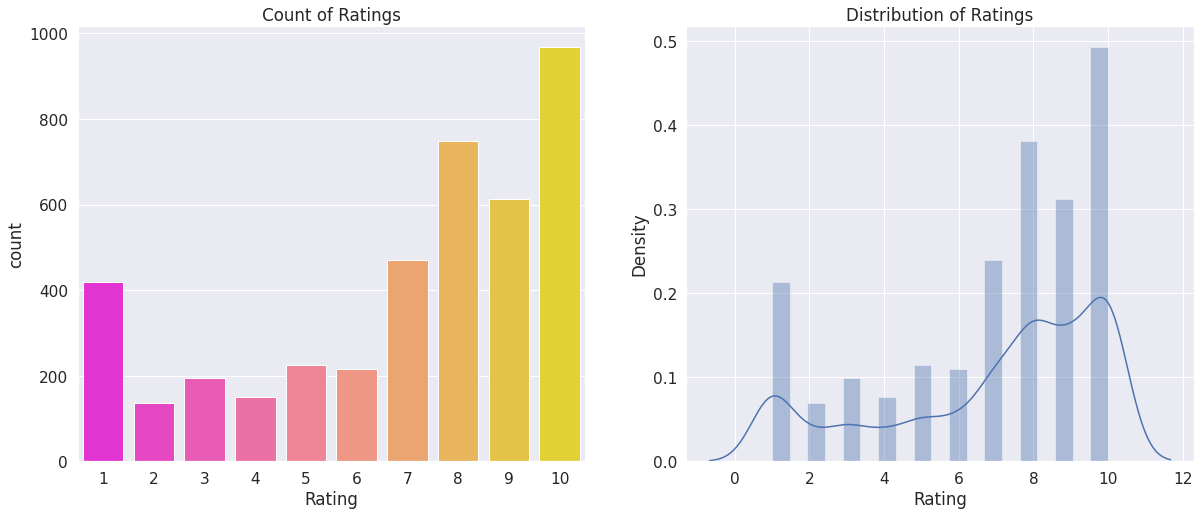

In [ ]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(df['rating'], palette = 'spring',  ax = ax[0])
sns_2 = sns.distplot(df['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating");

In [ ]:
df.loc[(df['rating'] <= 4), 'class_1'] = 'negative'   # neagtive review
df.loc[(df['rating'] > 4) &                       
       (df['rating'] < 7), 'class_1'] = 'neutral'     # neutral review
df.loc[(df['rating'] >= 7), 'class_1'] = 'positive'    # positve review

df['class_1'].value_counts()

positive    2800
negative     902
neutral      441
Name: class_1, dtype: int64

Text(0.5, 1.0, 'class destribution')

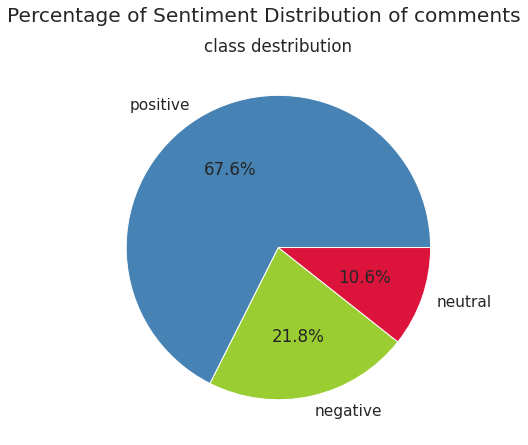

In [ ]:
fig, axes = plt.subplots(figsize=(16, 7), sharey=True)
fig.suptitle('Percentage of Sentiment Distribution of comments')

# TextBlob
perc = pd.DataFrame((df['class_1'].value_counts()/len(df))*100)
perc.reset_index(inplace=True)
perc.columns = ['Sentiment','Percentage']
axes.pie(perc['Percentage'],
        labels=perc['Sentiment'],
        autopct='%1.1f%%',
        colors=['steelblue','yellowgreen','crimson'])
axes.set_title("class destribution")


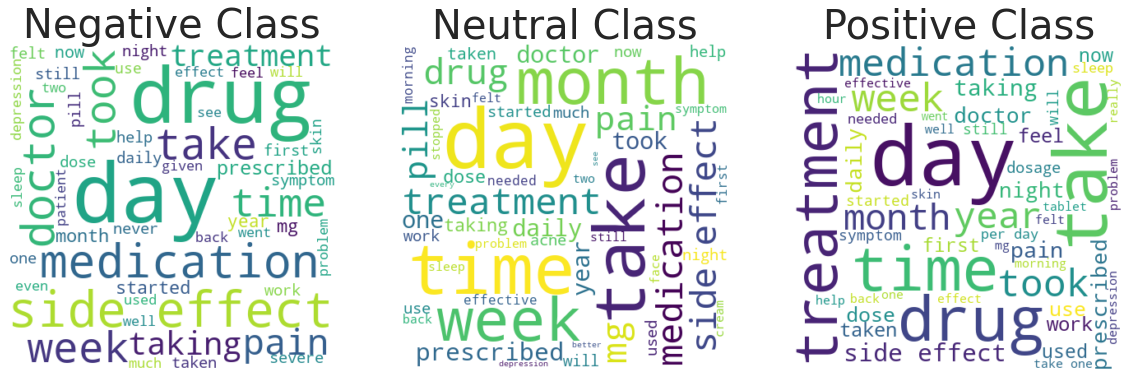

In [ ]:
#wordcloud to see importance of word for each label
from wordcloud import WordCloud

df.commentsReview=df.commentsReview.apply(str)

# Start with one review:
df_Negative = df[df['class_1']=='negative']
df_Positive = df[df['class_1']=='positive']
df_Neutral = df[df['class_1']=='neutral']

text_Neg = " ".join(review for review in df_Negative.commentsReview)
text_Pos = " ".join(review for review in df_Positive.commentsReview)
text_Neu = " ".join(review for review in df_Neutral.commentsReview)

fig, (ax1, ax2, ax3) = plt.subplots( 1, 3 , figsize  = (20,20))
# Create and generate a word cloud image:
wordcloud_Neg = WordCloud(height=400,max_words=50,background_color="white",collocations=True,max_font_size=100).generate(text_Neg)
wordcloud_Pos = WordCloud(height=400,max_words=50,background_color="white",collocations=True,max_font_size=100).generate(text_Pos)
wordcloud_Neu = WordCloud(height=400,max_words=50,background_color="white",collocations=True,max_font_size=100).generate(text_Neu)


# Display the generated image:
ax1.imshow(wordcloud_Neg, interpolation='bilinear')
ax1.set_title('Negative Class',fontsize=40)
ax1.axis('off')

ax2.imshow(wordcloud_Neu, interpolation='bilinear')
ax2.set_title('Neutral Class',fontsize=40)
ax2.axis('off')

ax3.imshow(wordcloud_Pos, interpolation='bilinear')
ax3.set_title('Positive Class',fontsize=40)
ax3.axis('off');



In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because",
                       "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not",
                       "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                       "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", 
                       "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
                       "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  
                       "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                       "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                       "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
                       "mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                       "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not",
                       "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                       "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
                       "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                       "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", 
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is",
                       "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                       "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", 
                       "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", 
                       "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not",
                       "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is",
                       "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", 
                       "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                       "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have",
                       "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                       "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would",
                       "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", 
                       "you've": "you have" }

def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

# lower each words in a review
df['cleaned_reviews'] = df['commentsReview'].apply(lambda x: x.lower()) 

# expand contractions
df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: clean_contractions(x, contraction_mapping))


In [ ]:
spec_chars = ["!",'"',"।","#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['cleaned_reviews'] = df['cleaned_reviews'].str.replace(char, ' ') 
    df['cleaned_reviews'] = df['cleaned_reviews'].str.split().str.join(' ')         #remove whitespace

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

df["cleaned_reviews"] = df["cleaned_reviews"].apply(lambda words: ' '.join(word for word in words.split() if word not in stoplist))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['cleaned_reviews'] = df['cleaned_reviews'].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["cleaned_reviews"] = df["cleaned_reviews"].apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from textblob import TextBlob
df['cleaned_reviews'] = df.cleaned_reviews.apply(lambda txt: ''.join(TextBlob(txt).correct()))


In [ ]:
df = df.dropna()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser= SentimentIntensityAnalyzer() 

def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

df['vader_polarity']= df['cleaned_reviews'].apply(get_vader_sentiment)


In [ ]:
df.loc[(df['vader_polarity'] <= -0.05), 'class_2'] = 'negative'   # neagtive review
df.loc[(df['vader_polarity'] >= 0.05), 'class_2'] = 'positve'     # neutral review
df.loc[(df['vader_polarity'] > -0.05) & 
       (df['vader_polarity'] < 0.05), 'class_2'] = 'neutral'    # positve review
df['class_2'].value_counts()

In [ ]:
fig, axes = plt.subplots(figsize=(16, 7), sharey=True)
fig.suptitle('Percentage of Sentiment Distribution of comments')

# TextBlob
perc = pd.DataFrame((df['class_2'].value_counts()/len(df))*100)
perc.reset_index(inplace=True)
perc.columns = ['Sentiment','Percentage']
axes.pie(perc['Percentage'],
        labels=perc['Sentiment'],
        autopct='%1.1f%%',
        colors=['steelblue','yellowgreen','crimson'])
axes.set_title("class destribution")


In [ ]:
from textblob import TextBlob

def get_textblob_sentiment(sent):
    return TextBlob(sent).sentiment.polarity
    
df['blob_polarity']= df['cleaned_reviews'].apply(get_textblob_sentiment)

In [ ]:
df.loc[(df['blob_polarity'] <= -0.05), 'class_3'] = 'negative'   # neagtive review
df.loc[(df['blob_polarity'] >= 0.05), 'class_3'] = 'positve'     # neutral review
df.loc[(df['blob_polarity'] > -0.05) & (df['blob_polarity'] < 0.05), 'class_3'] = 'neutral'    # positve review

df['class_3'].value_counts()

In [ ]:
fig, axes = plt.subplots(figsize=(16, 7), sharey=True)
fig.suptitle('Percentage of Sentiment Distribution of Tweet')

# TextBlob
perc = pd.DataFrame((df['class_3'].value_counts()/len(df))*100)
perc.reset_index(inplace=True)
perc.columns = ['Sentiment','Percentage']
axes.pie(perc['Percentage'],
        labels=perc['Sentiment'],
        autopct='%1.1f%%',
        colors=['steelblue','yellowgreen','crimson'])
axes.set_title("class destribution")


In [ ]:
df.head()